<a href="https://colab.research.google.com/github/thammagig/Hello-World/blob/master/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install mxnet-cu101mkl gluoncv
from mxnet import nd
import mxnet as mx
import numpy as np


     |████████████████████████████████| 711.0MB 26kB/s 
     |████████████████████████████████| 757kB 46.6MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
nd.array(((1,2,3),(5,6,7)))


[[1. 2. 3.]
 [5. 6. 7.]]
<NDArray 2x3 @cpu(0)>

In [0]:
x = nd.ones(shape=(2,3))

In [0]:
x


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [0]:
y = nd.random.uniform(low=-1, high=1, shape=(2,3))
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

In [0]:
(x.shape, x.size,x.dtype, x.context)

((2, 3), 6, numpy.float32, cpu(0))

In [0]:
nd.ones((2,3), dtype=np.uint8)


[[1 1 1]
 [1 1 1]]
<NDArray 2x3 @cpu(0)>

In [0]:
y.astype(np.float16)


[[0.09766 0.1857  0.4304 ]
 [0.6885  0.2056  0.716  ]]
<NDArray 2x3 @cpu(0)>

In [0]:
nd.ones((2,3),ctx=mx.cpu())


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

In [0]:
nd.ones((2,3),ctx=mx.gpu())


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @gpu(0)>

In [0]:
x_np, y_np = np.ones((10000,5000)), np.ones((5000,10000))
x_nd_cpu, y_nd_cpu = nd.ones((10000,5000), ctx=mx.cpu()), nd.ones((5000,1000), ctx=mx.cpu())
x_nd_gpu, y_nd_gpu = nd.ones((10000,5000), ctx=mx.gpu()), nd.ones((5000,1000), ctx=mx.gpu())

In [0]:
import time
tic = time.time()
np.dot(x_np,y_np)
print("Numpy time {:.4f}s".format(time.time()-tic))

Numpy time 22.7702s


In [0]:
tic = time.time()
nd.dot(x_nd_cpu,y_nd_cpu).wait_to_read()
print("MXNet CPU time {:.4f}s".format(time.time()-tic))

MXNet CPU time 1.1758s


In [0]:
tic = time.time()
nd.dot(x_nd_gpu,y_nd_gpu).wait_to_read()
print("MXNet GPU time {:.4f}s".format(time.time()-tic))


MXNet GPU time 0.0151s


In [0]:
type(x)

mxnet.ndarray.ndarray.NDArray

In [0]:
a = x.asnumpy()
(type(a),a)

(numpy.ndarray, array([[1., 1., 1.],
        [1., 1., 1.]], dtype=float32))

In [0]:
nd.array(a)


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

Operation NDArray

In [0]:
x = mx.nd.random.uniform(shape=(2,3))
y = mx.nd.full(shape=(2,3), val=2)
x,y

(
 [[0.5448832 0.8472517 0.4236548]
  [0.6235637 0.6458941 0.3843817]]
 <NDArray 2x3 @cpu(0)>, 
 [[2. 2. 2.]
  [2. 2. 2.]]
 <NDArray 2x3 @cpu(0)>)

In [0]:
x*y


[[1.0897664 1.6945034 0.8473096]
 [1.2471274 1.2917882 0.7687634]]
<NDArray 2x3 @cpu(0)>

Exponentiation

In [0]:
y.exp()


[[7.389056 7.389056 7.389056]
 [7.389056 7.389056 7.389056]]
<NDArray 2x3 @cpu(0)>

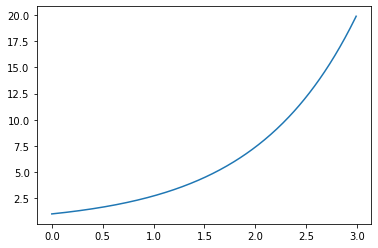

In [0]:
import matplotlib.pyplot as plt
o = plt.plot(np.arange(0,3,0.01), nd.arange(0,3,0.01).exp().asnumpy())

Matrix multiplication

In [0]:
x.shape, y.shape

((2, 3), (2, 3))

In [0]:
nd.dot(x, y.T)


[[3.6315794 3.6315794]
 [3.3076792 3.3076792]]
<NDArray 2x2 @cpu(0)>

Idexing

In [0]:
x


[[0.5448832 0.8472517 0.4236548]
 [0.6235637 0.6458941 0.3843817]]
<NDArray 2x3 @cpu(0)>

In [0]:
x[:,1:3]


[[0.8472517 0.4236548]
 [0.6458941 0.3843817]]
<NDArray 2x2 @cpu(0)>

Writing

In [0]:
y



[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

In [0]:
y[1:2, 0:2] = 8

In [0]:
y



[[2. 2. 2.]
 [8. 8. 2.]]
<NDArray 2x3 @cpu(0)>

In [0]:
from mxnet.gluon import nn

In [0]:
layer = nn.Conv2D(
    channels=1,
    kernel_size=(3,3),
    in_channels=1,
    strides=(1,1),
    padding=(0,0),
    activation='relu',
    prefix='conv_'
)
layer


Conv2D(1 -> 1, kernel_size=(3, 3), stride=(1, 1), Activation(relu))

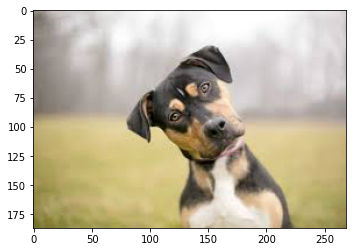

In [0]:
o = plt.imshow(plt.imread('download.jpeg'))

In [0]:
layer.initialize(mx.init.Constant([
                                   [-1,0,1], # Sobel Operator
                                   [-2,0,2], # Detect vertical lines
                                   [-1,0,1]]))

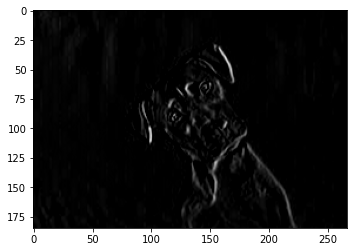

In [0]:
image = mx.image.imread('download.jpeg',0).astype('float32')
image_channel_first = image.transpose((2,0,1))
image_batchified = image_channel_first.expand_dims(axis=0)
output = layer(image_batchified)
o = plt.imshow(output.squeeze().asnumpy(), cmap='gray')

In [0]:
layer.collect_params()

conv_ (
  Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter conv_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [0]:
layer.collect_params()['conv_weight']

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [0]:
layer.weight

Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)

In [0]:
layer.weight.data()


[[[[-1.  0.  1.]
   [-2.  0.  2.]
   [-1.  0.  1.]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [0]:
layer.bias.data()


[0.]
<NDArray 1 @cpu(0)>

In [0]:
layer = nn.MaxPool2D(pool_size=(4,4))
layer

MaxPool2D(size=(4, 4), stride=(4, 4), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)